## 2

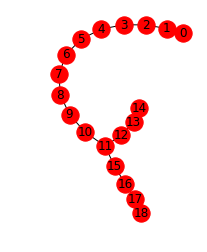

In [7]:
import networkx as nx


#Создание схемы алжирского метро
algier = nx.Graph()
algier.clear()
#line1
for i in range(19):
    algier.add_node(i)
for i in range(14):
    algier.add_edge(i, i + 1)
algier.add_edge(11, 15)
for i in range(15, 18):
    algier.add_edge(i, i + 1)
#print(algier.edges)

import matplotlib.pyplot as plt

plt.subplot(121)
nx.draw(algier, with_labels=True)
plt.show()

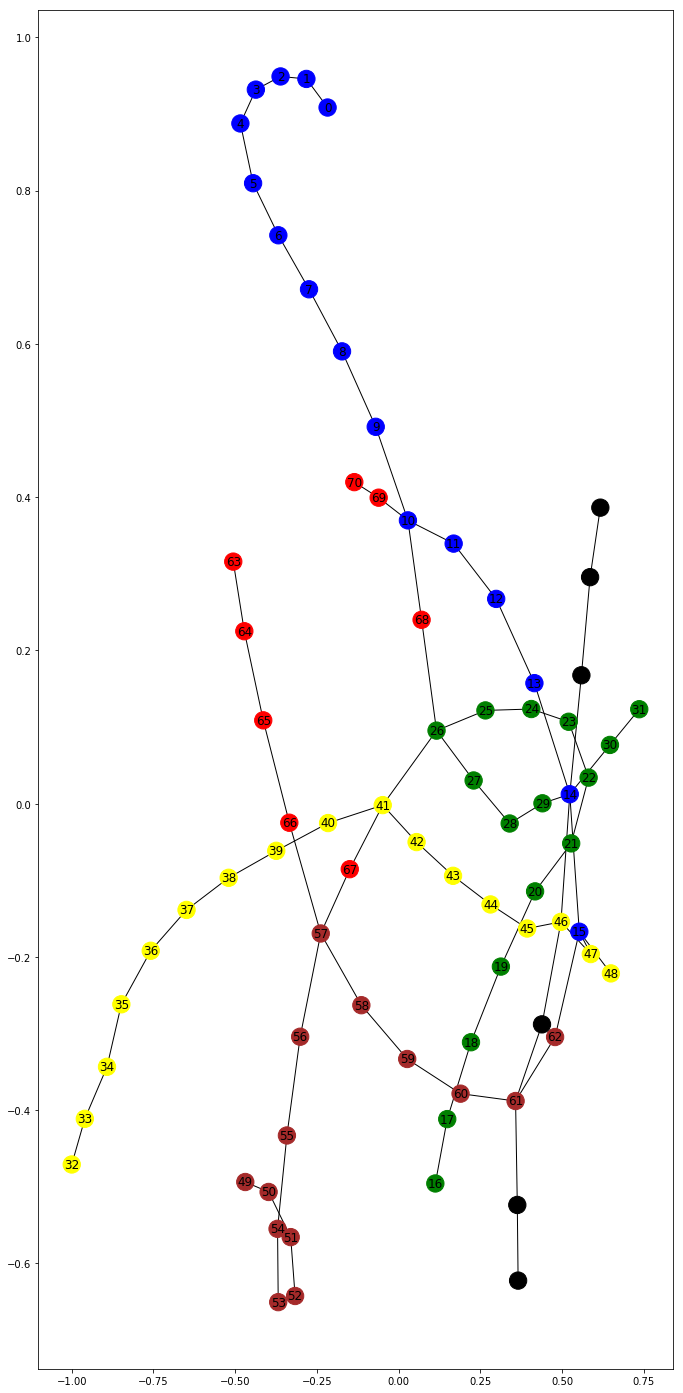

In [8]:
#Создание схемы метро Буэнос-Айреса
buenos = nx.Graph()
buenos.clear()
#line D
shls = []
shlst = []
shls.append([])
for i in range(16):
    buenos.add_node(i)
    shls[0].append(i)
    shlst.append('blue')
for i in range(15):
    buenos.add_edge(i, i + 1)
    
#line B
shls.append([])
for i in range(16, 32):
    buenos.add_node(i)
    shls[1].append(i)
    shlst.append('green')
for i in range(16, 29):
    buenos.add_edge(i, i + 1)
buenos.add_edge(29, 14)
buenos.add_edge(30, 14)
buenos.add_edge(30, 31)

#line A
shls.append([])
for i in range(32, 49):
    buenos.add_node(i)
    shls[2].append(i)
    shlst.append('yellow')
for i in range(32, 47):
    buenos.add_edge(i, i + 1)
buenos.add_edge(47, 15)
buenos.add_edge(48, 15)

#line E
shls.append([])
for i in range(49, 63):
    buenos.add_node(i)
    shls[3].append(i)
    shlst.append('brown')
for i in range(49, 62):
    buenos.add_edge(i, i + 1)
buenos.add_edge(62, 15)  

#line H
shls.append([])
for i in range(63, 71):
    buenos.add_node(i)
    shls[4].append(i)
    shlst.append('red')
for i in range(63, 66):
    buenos.add_edge(i, i + 1)
buenos.add_edge(66, 57)  
buenos.add_edge(67, 57)  
buenos.add_edge(67, 41)  
buenos.add_edge(26, 41)  
buenos.add_edge(26, 68)  
buenos.add_edge(10, 68)  
buenos.add_edge(10, 69)  
buenos.add_edge(70, 69)  

#line C
shls.append([])
for i in range(71, 77):
    buenos.add_node(i)
    shls[5].append(i)
    shlst.append('black')
for i in range(71, 72):
    buenos.add_edge(i, i + 1)
buenos.add_edge(72, 61)  
buenos.add_edge(73, 61)  
buenos.add_edge(73, 46)  
buenos.add_edge(14, 46)  
buenos.add_edge(14, 74)
for i in range(74, 76):
    buenos.add_edge(i, i + 1)
plt.figure(figsize=(25,25))
#buenos.remove_edge()
plt.subplot(121)
nx.draw_networkx(buenos, node_color=shlst, )
plt.show()

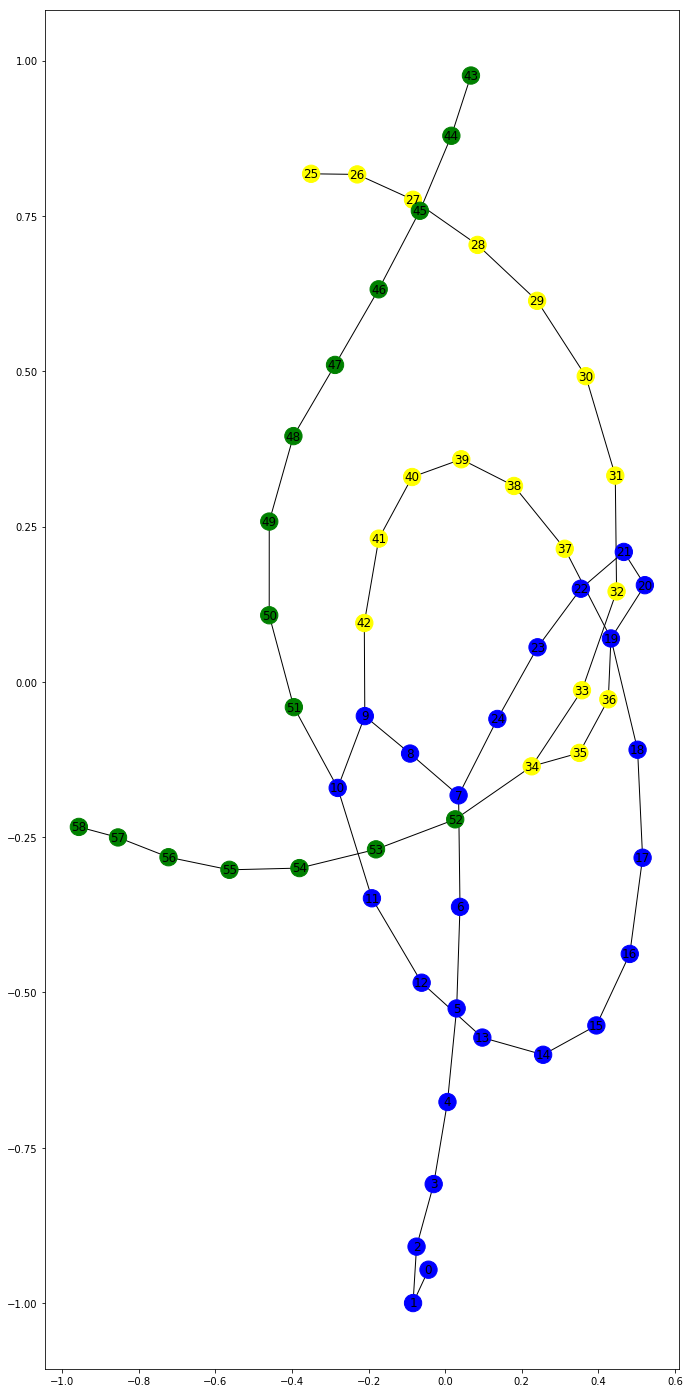

In [9]:
#Создание схемы метро Брюсселя
brussel = nx.Graph()
shlst = []
brussel.clear()

#Line 1
for i in range(25):
    brussel.add_node(i)
    shlst.append('blue')
for i in range(24):
    brussel.add_edge(i, i + 1)
brussel.add_edge(24, 7)

#line 2
for i in range(25, 43):
    brussel.add_node(i)
    shlst.append('yellow')
for i in range(25, 36):
    brussel.add_edge(i, i + 1)
brussel.add_edge(36, 19)
brussel.add_edge(37, 19)
for i in range(37, 42):
    brussel.add_edge(i, i + 1)
brussel.add_edge(42, 9)

#line 3
for i in range(43, 59):
    brussel.add_node(i)
    shlst.append('green')
for i in range(43, 51):
    brussel.add_edge(i, i + 1)
brussel.add_edge(51, 10)
brussel.add_edge(52, 34)
for i in range(52, 58):
    brussel.add_edge(i, i + 1)

    
plt.figure(figsize=(25,25))
#buenos.remove_edge()
plt.subplot(121)
nx.draw_networkx(brussel, node_color=shlst, )
plt.show()

## 3.1

In [10]:
#Удаление случайных вершин из графа метро Буэнос-Айреса и проверка на изоморфность с помощью VF2


from random import randint
#buenos.clear()
for i in range(59, 77):
    buenos.remove_node(list(buenos.nodes)[randint(0, len(buenos.nodes) - 1)])
    print(len(buenos.nodes))
#    print(len(brussel.nodes))
print(nx.is_isomorphic(buenos, brussel), len(buenos.edges), len(brussel.edges))

76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
False 49 60


## 3.2

In [11]:
#Проверка необходимых условий изоморфизма
#print(nx.degree(buenos))

#buenos = brussel
#1. Вершины и ребра
#print(nx.info(buenos))
if(len(buenos.nodes) == len(brussel.nodes) and len(buenos.edges) == len(brussel.edges)):
    #2. Степени вершин
    mas1 = []
    mas2 = []
    a1 = list(nx.degree(buenos))
    a2 = list(nx.degree(brussel))
    for i in range(59):
       # print(a1[i])
        mas1.append(a1[i][1])
        mas2.append(a2[i][1])
    mas1.sort()
    mas2.sort()
  #  print(mas1)
   # print(mas2)
    if mas1[:] == mas2[:]:
        #3. Компоненты связанности
        if(nx.number_connected_components(buenos) == nx.number_connected_components(brussel)):
            #4. Размеры простых циклов
            mas1 = nx.cycle_basis(buenos)
            mas2 = nx.cycle_basis(brussel)
            mas3 = []
            mas4 = []
         #   print('tak')
            for i in mas1:
                mas3.append(len(i))
            for i in mas2:
                mas4.append(len(i))
            mas3.sort()
            mas4.sort()
            if(mas3[:] == mas4[:]):
                print(True)
            else:
                print(False)
        else:
            print(False)
    else:
        print(False)
else:
    print(False)

False


## 4

In [12]:
#Проверка что существует в метро Брюсселя подграф изоморфный алжирскому метро и вывод всех таких подграфов
checker = nx.isomorphism.GraphMatcher(brussel,algier)
if(checker.subgraph_is_isomorphic()):
    print(True)
    subs = checker.subgraph_isomorphisms_iter()
    for i in subs:
        print(i)
else:
    print(False)

True
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 24: 6, 23: 7, 22: 8, 21: 9, 20: 10, 19: 11, 36: 12, 35: 13, 34: 14, 37: 15, 38: 16, 39: 17, 40: 18}
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 24: 6, 23: 7, 22: 8, 21: 9, 20: 10, 19: 11, 36: 12, 35: 13, 34: 14, 18: 15, 17: 16, 16: 17, 15: 18}
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 24: 6, 23: 7, 22: 8, 21: 9, 20: 10, 19: 11, 37: 12, 38: 13, 39: 14, 36: 15, 35: 16, 34: 17, 33: 18}
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 24: 6, 23: 7, 22: 8, 21: 9, 20: 10, 19: 11, 37: 12, 38: 13, 39: 14, 36: 15, 35: 16, 34: 17, 52: 18}
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 24: 6, 23: 7, 22: 8, 21: 9, 20: 10, 19: 11, 37: 12, 38: 13, 39: 14, 18: 15, 17: 16, 16: 17, 15: 18}
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 24: 6, 23: 7, 22: 8, 21: 9, 20: 10, 19: 11, 18: 12, 17: 13, 16: 14, 36: 15, 35: 16, 34: 17, 33: 18}
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 24: 6, 23: 7, 22: 8, 21: 9, 20: 10, 19: 11, 18: 12, 17: 13, 16: 14, 36: 15, 35: 16, 34: 17, 52: 18}
{2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5,

{26: 0, 27: 1, 28: 2, 29: 3, 30: 4, 31: 5, 32: 6, 33: 7, 34: 8, 35: 9, 36: 10, 19: 11, 37: 12, 38: 13, 39: 14, 18: 15, 17: 16, 16: 17, 15: 18}
{26: 0, 27: 1, 28: 2, 29: 3, 30: 4, 31: 5, 32: 6, 33: 7, 34: 8, 35: 9, 36: 10, 19: 11, 37: 12, 38: 13, 39: 14, 20: 15, 21: 16, 22: 17, 23: 18}
{26: 0, 27: 1, 28: 2, 29: 3, 30: 4, 31: 5, 32: 6, 33: 7, 34: 8, 35: 9, 36: 10, 19: 11, 18: 12, 17: 13, 16: 14, 37: 15, 38: 16, 39: 17, 40: 18}
{26: 0, 27: 1, 28: 2, 29: 3, 30: 4, 31: 5, 32: 6, 33: 7, 34: 8, 35: 9, 36: 10, 19: 11, 18: 12, 17: 13, 16: 14, 20: 15, 21: 16, 22: 17, 23: 18}
{26: 0, 27: 1, 28: 2, 29: 3, 30: 4, 31: 5, 32: 6, 33: 7, 34: 8, 35: 9, 36: 10, 19: 11, 20: 12, 21: 13, 22: 14, 37: 15, 38: 16, 39: 17, 40: 18}
{26: 0, 27: 1, 28: 2, 29: 3, 30: 4, 31: 5, 32: 6, 33: 7, 34: 8, 35: 9, 36: 10, 19: 11, 20: 12, 21: 13, 22: 14, 18: 15, 17: 16, 16: 17, 15: 18}
{32: 0, 33: 1, 34: 2, 35: 3, 36: 4, 19: 5, 20: 6, 21: 7, 22: 8, 23: 9, 24: 10, 7: 11, 6: 12, 5: 13, 4: 14, 8: 15, 9: 16, 10: 17, 11: 18}
{32: 